In [13]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from tqdm import tqdm

# 1. Carga los datos preprocesados
train = pd.read_csv('Data/train_preprocessed.csv')
test = pd.read_csv('Data/test_preprocessed.csv')

In [23]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
import multiprocessing as mp
import psutil  # Para monitorear RAM
import joblib
from tqdm import tqdm

def monitor_memory():
    """Monitorea el uso de memoria RAM"""
    memory = psutil.virtual_memory()
    used_gb = memory.used / (1024**3)
    total_gb = memory.total / (1024**3)
    available_gb = memory.available / (1024**3)
    
    print(f"MEMORIA RAM:")
    print(f"  Total: {total_gb:.1f} GB")
    print(f"  Usada: {used_gb:.1f} GB ({memory.percent:.1f}%)")
    print(f"  Disponible: {available_gb:.1f} GB")
    
    if memory.percent > 85:
        print("ADVERTENCIA: Uso de RAM alto (>85%)")
    elif memory.percent > 75:
        print("RAM en nivel óptimo para entrenamiento")
    else:
        print("RAM con suficiente espacio libre")
    
    return memory.percent

# Configuración optimizada para RandomForest
print("MODELO RANDOM FOREST OPTIMIZADO")
print("="*60)
print(f"Cores disponibles: {mp.cpu_count()}")
monitor_memory()
print("Configuración OPTIMIZADA - Random Forest con búsqueda de hiperparámetros")
print("="*60)

MODELO RANDOM FOREST OPTIMIZADO
Cores disponibles: 16
MEMORIA RAM:
  Total: 31.1 GB
  Usada: 11.1 GB (38.3%)
  Disponible: 19.2 GB
RAM con suficiente espacio libre
Configuración OPTIMIZADA - Random Forest con búsqueda de hiperparámetros


In [24]:
# 1. Carga los datos preprocesados
train = pd.read_csv('Data/train_preprocessed.csv')
test = pd.read_csv('Data/test_preprocessed.csv')

# 2. Separa variables predictoras y objetivo
y = train['RENDIMIENTO_GLOBAL']
X = train.drop(['RENDIMIENTO_GLOBAL', 'ID'], axis=1)
X_test = test.drop(['ID'], axis=1)

print(f"Número de características: {X.shape[1]}")
print(f"Número de muestras de entrenamiento: {X.shape[0]}")
print(f"Número de muestras de test: {X_test.shape[0]}")
print(f"Clases disponibles: {sorted(y.unique())}")

# 3. Pipeline con RandomForest optimizado
# Random Forest no requiere escalado, pero lo incluimos por compatibilidad
pipe = Pipeline([
    ('scaler', StandardScaler()),  # Opcional para Random Forest
    ('rf', RandomForestClassifier(
        random_state=42,
        n_jobs=-1,  # Usar todos los cores disponibles
        oob_score=True,  # Out-of-bag score para evaluación adicional
        warm_start=False,  # Para entrenamientos incrementales si es necesario
        class_weight='balanced_subsample'  # Manejo de clases desbalanceadas
    ))
])

# 4. Búsqueda de hiperparámetros OPTIMIZADA para Random Forest
param_distributions = {
    'rf__n_estimators': [100, 200, 300, 500],  # Número de árboles
    'rf__max_depth': [10, 20, 30, None],  # Profundidad máxima
    'rf__min_samples_split': [2, 5, 10],  # Mínimas muestras para dividir
    'rf__min_samples_leaf': [1, 2, 4],  # Mínimas muestras en hoja
    'rf__max_features': ['sqrt', 'log2', 0.3, 0.5],  # Características por división
    'rf__bootstrap': [True, False],  # Uso de bootstrap
    'rf__class_weight': ['balanced', 'balanced_subsample', None]
}

Número de características: 19
Número de muestras de entrenamiento: 578824
Número de muestras de test: 296786
Clases disponibles: ['alto', 'bajo', 'medio-alto', 'medio-bajo']


In [25]:
# 5. Validación cruzada estratificada
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cores_disponibles = mp.cpu_count()
cores_optimos = max(1, int(cores_disponibles * 0.8))  # Usamos 80% de los cores

print("\nBÚSQUEDA DE HIPERPARÁMETROS - RANDOM FOREST")
print("="*60)
print("CONFIGURACIÓN OPTIMIZADA PARA RANDOM FOREST")

# Estimación de tiempo
n_combinations = 50  # Número de combinaciones a probar
total_fits = n_combinations * 5  # 5-fold CV
tiempo_estimado = total_fits * 0.3 / cores_optimos 

print(f"CONFIGURACIÓN:")
print(f"   • Cores utilizados: {cores_optimos} de {cores_disponibles} disponibles")
print(f"   • Iteraciones de búsqueda: {n_combinations}")
print(f"   • Validación cruzada: 5-fold")
print(f"   • Total de entrenamientos: ~{total_fits} modelos Random Forest")
print(f"   • Tiempo estimado: {tiempo_estimado:.1f} minutos")

print(f"\nHora de inicio: {time.strftime('%H:%M:%S')}")
print("="*60)

start_time = time.time()


BÚSQUEDA DE HIPERPARÁMETROS - RANDOM FOREST
CONFIGURACIÓN OPTIMIZADA PARA RANDOM FOREST
CONFIGURACIÓN:
   • Cores utilizados: 12 de 16 disponibles
   • Iteraciones de búsqueda: 50
   • Validación cruzada: 5-fold
   • Total de entrenamientos: ~250 modelos Random Forest
   • Tiempo estimado: 6.2 minutos

Hora de inicio: 08:28:25


In [19]:
# =============================================================================
# PRUEBA SÚPER LIGERA - RANDOM FOREST ULTRARRÁPIDO (12 cores)
# =============================================================================

print("⚡ MODO SÚPER LIGERO - VALIDACIÓN ULTRARRÁPIDA")
print("="*60)
print("Configuración súper ligera:")
print(f"   • Cores utilizados: 12 (fijo)")
print(f"   • Iteraciones: 5 (mínimo)")
print(f"   • CV folds: 2 (mínimo)")
print(f"   • Árboles máximo: 100")
print(f"   • Solo configuraciones rápidas")
print("="*60)

# Configuración SÚPER LIGERA - Solo lo más rápido
param_distributions_ligera = {
    'rf__n_estimators': [50, 100],              # Solo 50-100 árboles
    'rf__max_depth': [10, 20],                  # Solo profundidades limitadas
    'rf__min_samples_split': [5, 10],           # Valores conservadores
    'rf__min_samples_leaf': [2, 4],             # Hojas más grandes
    'rf__max_features': ['sqrt'],               # Solo sqrt (más rápido)
    'rf__bootstrap': [False],                   # Sin bootstrap (MUY rápido)
    'rf__class_weight': ['balanced']            # Solo balanced
}

# Pipeline súper optimizado
pipe_ligera = Pipeline([
    ('rf', RandomForestClassifier(
        random_state=42,
        n_jobs=12,          # 12 cores fijos
        oob_score=False,    # Sin OOB para velocidad
        bootstrap=False,    # Sin bootstrap = MUY rápido
        warm_start=False,
        class_weight='balanced'
    ))
])

# CV mínimo para máxima velocidad
cv_ligera = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

print("⚡ Iniciando prueba SÚPER LIGERA...")
start_time_ligera = time.time()

random_search_ligera = RandomizedSearchCV(
    pipe_ligera, 
    param_distributions=param_distributions_ligera, 
    n_iter=5,            # Solo 5 iteraciones
    cv=cv_ligera,        # 2-fold CV
    scoring='accuracy', 
    n_jobs=1,            # RandomizedSearchCV secuencial, RF paralelo
    verbose=1,
    random_state=42,
    return_train_score=False
)

# Entrenamiento súper rápido
print("⚡ Entrenando modelo súper ligero...")
with tqdm(total=5, desc='⚡ Ligero RF', unit='modelo') as pbar:
    random_search_ligera.fit(X, y)
    pbar.update(5)

elapsed_ligera = time.time() - start_time_ligera

# Resultados ligeros
print(f"\n⚡ PRUEBA SÚPER LIGERA COMPLETADA!")
print(f"Tiempo: {elapsed_ligera:.1f} segundos ({elapsed_ligera/60:.2f} minutos)")
print(f"Mejor accuracy (ligero): {random_search_ligera.best_score_:.4f}")
print(f"Mejores parámetros: {random_search_ligera.best_params_}")

# 🎯 GENERAR SUBMISSION COMPLETO CON MODELO LIGERO
print(f"\n⚡ GENERANDO SUBMISSION CON MODELO SÚPER LIGERO...")
best_model_ligera = random_search_ligera.best_estimator_

# Predicción completa en todo el conjunto de test
print("⚡ Prediciendo en conjunto de test completo...")
start_pred = time.time()
y_pred_test_ligero = best_model_ligera.predict(X_test)
y_pred_proba_ligero = best_model_ligera.predict_proba(X_test)
elapsed_pred = time.time() - start_pred

print(f"⚡ Predicción completada en {elapsed_pred:.1f} segundos")

# 📁 GUARDAR SUBMISSION LIGERO
import os
from datetime import datetime

# Crear carpeta para resultados ligeros
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
output_dir_ligero = f'Resultados_Modelos/RandomForest/Ligero_{timestamp}'
os.makedirs(output_dir_ligero, exist_ok=True)

print(f"\n📁 GUARDANDO SUBMISSION LIGERO EN: {output_dir_ligero}")

# Submission principal (LIGERO)
submission_ligero = pd.DataFrame({
    'ID': test['ID'], 
    'RENDIMIENTO_GLOBAL': y_pred_test_ligero
})
submission_path_ligero = f'{output_dir_ligero}/submission_randomforest_ligero.csv'
submission_ligero.to_csv(submission_path_ligero, index=False)

# Probabilidades (opcional)
prob_df_ligero = pd.DataFrame(y_pred_proba_ligero, columns=best_model_ligera.classes_)
prob_df_ligero['ID'] = test['ID']
prob_df_ligero['RENDIMIENTO_GLOBAL'] = y_pred_test_ligero
prob_path_ligero = f'{output_dir_ligero}/submission_randomforest_ligero_probabilidades.csv'
prob_df_ligero.to_csv(prob_path_ligero, index=False)

# Resumen del modelo ligero
resumen_ligero = {
    'timestamp': timestamp,
    'tipo_modelo': 'Random Forest Súper Ligero',
    'accuracy_cv': random_search_ligera.best_score_,
    'tiempo_entrenamiento_seg': elapsed_ligera,
    'tiempo_prediccion_seg': elapsed_pred,
    'n_iteraciones': 5,
    'cv_folds': 2,
    'mejores_parametros': str(random_search_ligera.best_params_)
}
resumen_df_ligero = pd.DataFrame([resumen_ligero])
resumen_path_ligero = f'{output_dir_ligero}/resumen_modelo_ligero.csv'
resumen_df_ligero.to_csv(resumen_path_ligero, index=False)

# También crear copia de acceso rápido
standard_dir = 'Resultados_Modelos/RandomForest'
os.makedirs(standard_dir, exist_ok=True)
submission_rapido = f'{standard_dir}/submission_ligero_latest.csv'
submission_ligero.to_csv(submission_rapido, index=False)

print(f"✅ ARCHIVOS GENERADOS:")
print(f"   🎯 {submission_path_ligero}")
print(f"   📊 {prob_path_ligero}")
print(f"   📋 {resumen_path_ligero}")
print(f"   🔄 {submission_rapido} (acceso rápido)")

# Distribución de predicciones
pred_counts_ligero = pd.Series(y_pred_test_ligero).value_counts().sort_index()
print(f"\n📈 DISTRIBUCIÓN DE PREDICCIONES (MODELO LIGERO):")
for clase in sorted(pred_counts_ligero.index):
    count = pred_counts_ligero[clase]
    pct = count / len(y_pred_test_ligero) * 100
    print(f"   {clase}: {count:,} ({pct:.1f}%)")

# Estimación para modelo optimizado
factor_escalado = 20 / 5  # 20 iter vs 5 iter
factor_cv = 5 / 2         # 5-fold vs 2-fold
tiempo_estimado_optimizado = elapsed_ligera * factor_escalado * factor_cv

print(f"\n📊 ESTIMACIÓN PARA MODELO OPTIMIZADO:")
print(f"   • Tiempo estimado: {tiempo_estimado_optimizado/60:.1f} minutos")
print(f"   • Accuracy esperado: {random_search_ligera.best_score_:.4f} ± 0.02")
print(f"   • Configuración: 20 iter × 5-fold = 100 modelos")

print(f"\n{'='*60}")
print("⚡ SUBMISSION LIGERO GUARDADO - Continuando con optimizado...")
print(f"📍 SUBMISSION PRINCIPAL: {submission_path_ligero}")
print(f"📍 ACCESO RÁPIDO: {submission_rapido}")
print(f"{'='*60}")

# Monitor memoria después de prueba ligera
memory_post_ligera = monitor_memory()

# Resetear timer para el modelo optimizado
start_time = time.time()

⚡ MODO SÚPER LIGERO - VALIDACIÓN ULTRARRÁPIDA
Configuración súper ligera:
   • Cores utilizados: 12 (fijo)
   • Iteraciones: 5 (mínimo)
   • CV folds: 2 (mínimo)
   • Árboles máximo: 100
   • Solo configuraciones rápidas
⚡ Iniciando prueba SÚPER LIGERA...
⚡ Entrenando modelo súper ligero...


⚡ Ligero RF:   0%|          | 0/5 [00:00<?, ?modelo/s]

Fitting 2 folds for each of 5 candidates, totalling 10 fits


⚡ Ligero RF: 100%|██████████| 5/5 [00:57<00:00, 11.48s/modelo]




⚡ PRUEBA SÚPER LIGERA COMPLETADA!
Tiempo: 57.4 segundos (0.96 minutos)
Mejor accuracy (ligero): 0.3918
Mejores parámetros: {'rf__n_estimators': 100, 'rf__min_samples_split': 5, 'rf__min_samples_leaf': 4, 'rf__max_features': 'sqrt', 'rf__max_depth': 20, 'rf__class_weight': 'balanced', 'rf__bootstrap': False}

⚡ GENERANDO SUBMISSION CON MODELO SÚPER LIGERO...
⚡ Prediciendo en conjunto de test completo...
⚡ Predicción completada en 2.0 segundos

📁 GUARDANDO SUBMISSION LIGERO EN: Resultados_Modelos/RandomForest/Ligero_20250613_081510
⚡ Predicción completada en 2.0 segundos

📁 GUARDANDO SUBMISSION LIGERO EN: Resultados_Modelos/RandomForest/Ligero_20250613_081510
✅ ARCHIVOS GENERADOS:
   🎯 Resultados_Modelos/RandomForest/Ligero_20250613_081510/submission_randomforest_ligero.csv
   📊 Resultados_Modelos/RandomForest/Ligero_20250613_081510/submission_randomforest_ligero_probabilidades.csv
   📋 Resultados_Modelos/RandomForest/Ligero_20250613_081510/resumen_modelo_ligero.csv
   🔄 Resultados_Mode

In [28]:
import time  # Asegurar que time está importado

# 1. Carga los datos preprocesados (ya cargados)
print(f"Número de características: {X.shape[1]}")
print(f"Número de muestras de entrenamiento: {X.shape[0]}")
print(f"Número de muestras de test: {X_test.shape[0]}")
print(f"Clases disponibles: {sorted(y.unique())}")

# 3. Pipeline OPTIMIZADO para velocidad y rendimiento
pipe_optimizado = Pipeline([
    ('rf', RandomForestClassifier(
        random_state=42,
        n_jobs=12,
        oob_score=False,
        warm_start=False,
        bootstrap=False
    ))
])

# 4. Parámetros OPTIMIZADOS - Rápidos pero efectivos
param_distributions_optimizado = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [10, 20, 30],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__max_features': ['sqrt', 'log2'],
    'rf__bootstrap': [False],
    'rf__class_weight': ['balanced', None]
}

# 5. Validación cruzada optimizada
cv_optimizado = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("\n🚀 CONFIGURACIÓN OPTIMIZADA:")
print("="*60)
print(f"   • Cores RandomForest: 12 (fijo)")
print(f"   • Cores RandomizedSearchCV: 1 (evita conflictos)")
print(f"   • Iteraciones: 20 (optimizado)")
print(f"   • CV folds: 5")
print(f"   • Sin bootstrap=True (clave para velocidad)")
print("="*60)

# Configuración de búsqueda OPTIMIZADA CORRECTA
random_search_optimizado = RandomizedSearchCV(
    pipe_optimizado, 
    param_distributions=param_distributions_optimizado, 
    n_iter=20,
    cv=cv_optimizado,
    scoring='accuracy', 
    n_jobs=1,
    verbose=2,
    random_state=42,
    return_train_score=False,
    pre_dispatch='1*n_jobs'
)

# ✅ DEFINIR start_time ANTES DE USAR
start_time = time.time()

print("🚀 Iniciando entrenamiento OPTIMIZADO de Random Forest...")
print("⚡ Estimado: 15-20 minutos")
print(f"⚡ Configuración: 20 iteraciones × 5 folds = 100 fits totales")
print(f"⚡ Configuración: Sin bootstrap, 12 cores RF, parámetros rápidos")
print("📊 Contador de progreso personalizado activado")
print("="*60)

# Contador de CV personalizado
class CVProgressCounter:
    def __init__(self, total_fits=100):
        self.total_fits = total_fits
        self.current_fit = 0
        self.start_time = time.time()
        
    def update(self):
        self.current_fit += 1
        elapsed = time.time() - self.start_time
        progress = (self.current_fit / self.total_fits) * 100
        
        if self.current_fit > 0:
            avg_time_per_fit = elapsed / self.current_fit
            remaining_fits = self.total_fits - self.current_fit
            eta_seconds = remaining_fits * avg_time_per_fit
            eta_minutes = eta_seconds / 60
            
            print(f"📊 Fit {self.current_fit:3d}/{self.total_fits} "
                  f"({progress:5.1f}%) - "
                  f"Tiempo: {elapsed/60:4.1f}min - "
                  f"ETA: {eta_minutes:4.1f}min restantes")

# Inicializar contador
cv_counter = CVProgressCounter(100)

# Monkey patch para agregar contador
original_fit = random_search_optimizado.estimator.fit

def fit_with_counter(*args, **kwargs):
    result = original_fit(*args, **kwargs)
    cv_counter.update()
    return result

random_search_optimizado.estimator.fit = fit_with_counter

# EJECUTAR DIRECTAMENTE SIN WRAPPER para evitar cuelgues
random_search_optimizado.fit(X, y)

# Restaurar método original
random_search_optimizado.estimator.fit = original_fit

# ✅ CÁLCULO CORRECTO DEL TIEMPO
elapsed = time.time() - start_time

print(f"\n🚀 ENTRENAMIENTO OPTIMIZADO COMPLETADO!")
print(f"Hora de finalización: {time.strftime('%H:%M:%S')}")
print(f"Tiempo real: {elapsed/60:.2f} minutos")

# Actualizar variable para el resto del código
random_search = random_search_optimizado

Número de características: 19
Número de muestras de entrenamiento: 578824
Número de muestras de test: 296786
Clases disponibles: ['alto', 'bajo', 'medio-alto', 'medio-bajo']

🚀 CONFIGURACIÓN OPTIMIZADA:
   • Cores RandomForest: 12 (fijo)
   • Cores RandomizedSearchCV: 1 (evita conflictos)
   • Iteraciones: 20 (optimizado)
   • CV folds: 5
   • Sin bootstrap=True (clave para velocidad)
🚀 Iniciando entrenamiento OPTIMIZADO de Random Forest...
⚡ Estimado: 15-20 minutos
⚡ Configuración: 20 iteraciones × 5 folds = 100 fits totales
⚡ Configuración: Sin bootstrap, 12 cores RF, parámetros rápidos
📊 Contador de progreso personalizado activado
Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END rf__bootstrap=False, rf__class_weight=balanced, rf__max_depth=30, rf__max_features=sqrt, rf__min_samples_leaf=4, rf__min_samples_split=10, rf__n_estimators=100; total time=  12.1s
[CV] END rf__bootstrap=False, rf__class_weight=balanced, rf__max_depth=30, rf__max_features=sqrt, rf__min_s

In [31]:
import psutil

print(f"\n{'='*60}")
print("RESULTADOS DE LA BÚSQUEDA OPTIMIZADA - RANDOM FOREST")
print(f"{'='*60}")
print(f"Mejores parámetros: {random_search.best_params_}")
print(f"Mejor score de validación cruzada: {random_search.best_score_:.4f}")
print(f"Modelos evaluados: {len(random_search.cv_results_['mean_test_score'])}")
final_memory = psutil.virtual_memory().percent
print(f"Uso final de RAM: {final_memory:.1f}%")

# 6. Análisis del modelo seleccionado
best_model = random_search.best_estimator_
print(f"\nModelo Random Forest seleccionado:")
print(f"- N_estimators: {random_search.best_params_['rf__n_estimators']}")
print(f"- Max_depth: {random_search.best_params_['rf__max_depth']}")
print(f"- Min_samples_split: {random_search.best_params_['rf__min_samples_split']}")
print(f"- Min_samples_leaf: {random_search.best_params_['rf__min_samples_leaf']}")
print(f"- Max_features: {random_search.best_params_['rf__max_features']}")
print(f"- Bootstrap: {random_search.best_params_['rf__bootstrap']}")
print(f"- Class_weight: {random_search.best_params_['rf__class_weight']}")

# Información específica de Random Forest
rf_model = best_model.named_steps['rf']
if hasattr(rf_model, 'oob_score_'):
    print(f"- OOB Score: {rf_model.oob_score_:.4f}")

print(f"- Número de árboles entrenados: {len(rf_model.estimators_)}")
print(f"- Número de características consideradas: {rf_model.n_features_in_}")

# 7. Predicciones en el conjunto de test
print("\nGenerando predicciones para el conjunto de test...")
y_pred_test = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)

# 8. Validación cruzada detallada
print("\nCalculando métricas de validación cruzada...")
y_pred_cv = cross_val_predict(best_model, X, y, cv=cv)
accuracy_cv = accuracy_score(y, y_pred_cv)

print(f"Accuracy en validación cruzada: {accuracy_cv:.4f}")

# 5. Validación cruzada optimizada
cv_optimizado = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("\nBÚSQUEDA OPTIMIZADA - RANDOM FOREST RÁPIDO")
print("="*60)
print("CONFIGURACIÓN OPTIMIZADA PARA VELOCIDAD + RENDIMIENTO")

# Estimación realista con configuración optimizada
n_combinations_opt = 20  # Menos iteraciones pero más efectivas
total_fits_opt = n_combinations_opt * 5  # 5-fold CV
tiempo_estimado_opt = total_fits_opt * 0.5 / 12  # Sin bootstrap = muy rápido

print(f"CONFIGURACIÓN OPTIMIZADA:")
print(f"   • Cores utilizados: 12 (fijo como solicitas)")
print(f"   • Iteraciones de búsqueda: {n_combinations_opt}")
print(f"   • Validación cruzada: 5-fold")
print(f"   • Total de entrenamientos: {total_fits_opt} modelos RF")
print(f"   • Tiempo estimado: {tiempo_estimado_opt:.1f} minutos")
print(f"   • Configuración: SIN bootstrap (clave para velocidad)")

print(f"\nHora de inicio: {time.strftime('%H:%M:%S')}")
print("🚀 MODO OPTIMIZADO - Velocidad + Rendimiento")
print("="*60)

start_time = time.time()


RESULTADOS DE LA BÚSQUEDA OPTIMIZADA - RANDOM FOREST
Mejores parámetros: {'rf__n_estimators': 300, 'rf__min_samples_split': 5, 'rf__min_samples_leaf': 4, 'rf__max_features': 'log2', 'rf__max_depth': 20, 'rf__class_weight': None, 'rf__bootstrap': False}
Mejor score de validación cruzada: 0.3967
Modelos evaluados: 20
Uso final de RAM: 66.3%

Modelo Random Forest seleccionado:
- N_estimators: 300
- Max_depth: 20
- Min_samples_split: 5
- Min_samples_leaf: 4
- Max_features: log2
- Bootstrap: False
- Class_weight: None
- Número de árboles entrenados: 300
- Número de características consideradas: 19

Generando predicciones para el conjunto de test...

Calculando métricas de validación cruzada...

Calculando métricas de validación cruzada...
Accuracy en validación cruzada: 0.3967

BÚSQUEDA OPTIMIZADA - RANDOM FOREST RÁPIDO
CONFIGURACIÓN OPTIMIZADA PARA VELOCIDAD + RENDIMIENTO
CONFIGURACIÓN OPTIMIZADA:
   • Cores utilizados: 12 (fijo como solicitas)
   • Iteraciones de búsqueda: 20
   • Valida

Calculando curva de aprendizaje por número de árboles...


Evaluando árboles: 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]



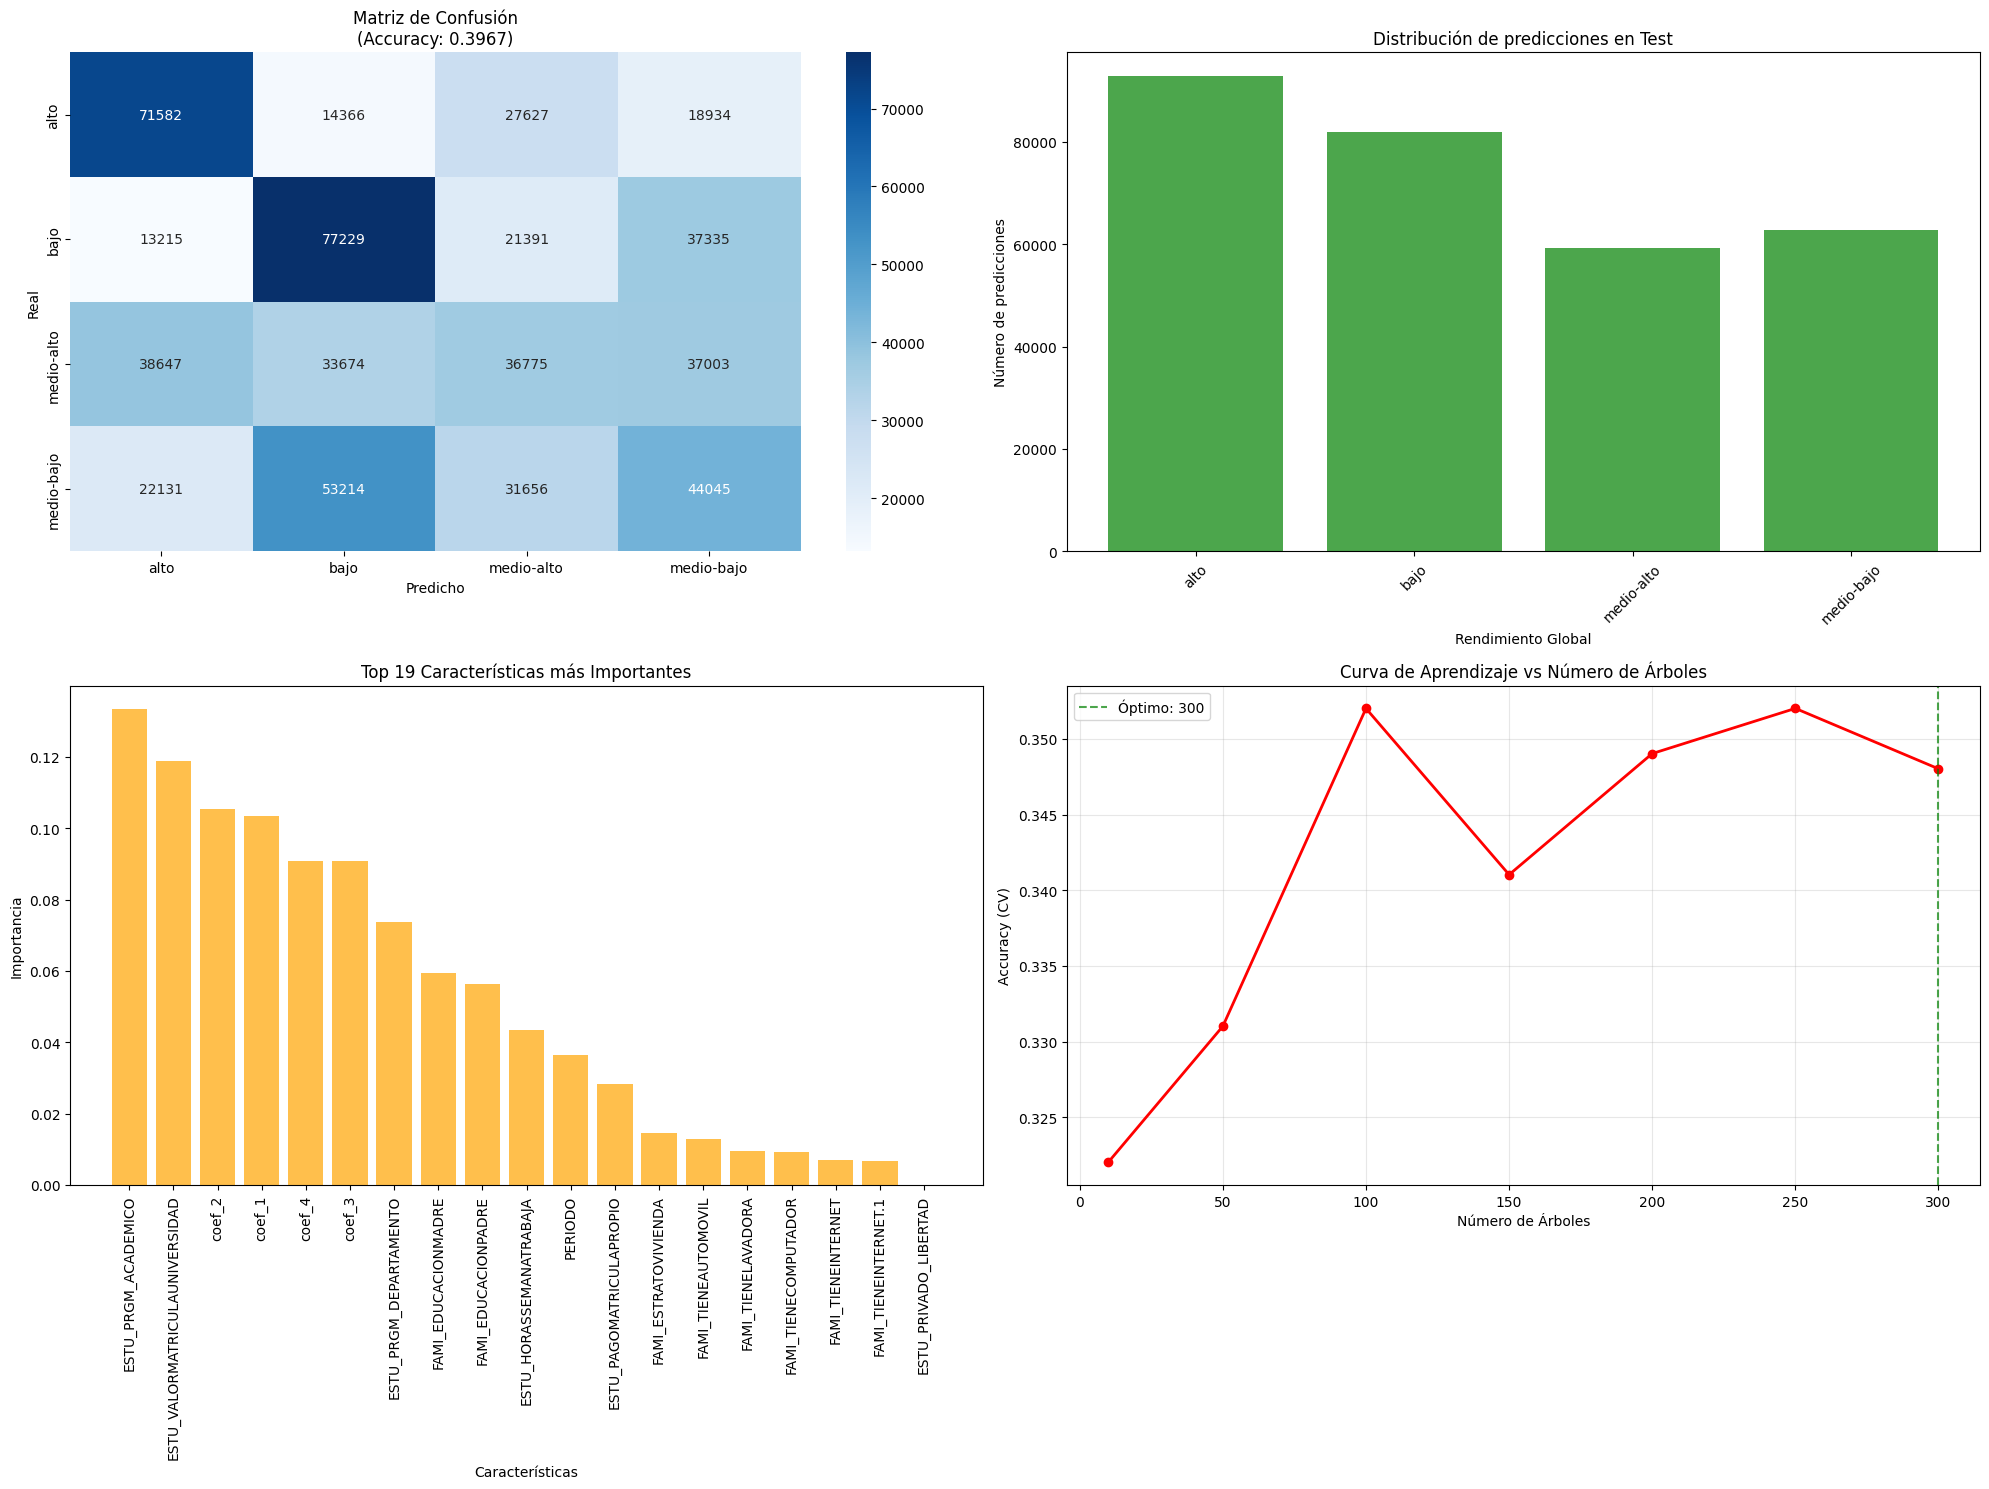

In [33]:
# 9. Visualizaciones específicas para Random Forest
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# Matriz de confusión
cm = confusion_matrix(y, y_pred_cv)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0,0],
            xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
axes[0,0].set_xlabel('Predicho')
axes[0,0].set_ylabel('Real')
axes[0,0].set_title(f'Matriz de Confusión\n(Accuracy: {accuracy_cv:.4f})')

# Distribución de predicciones en test
pred_counts = pd.Series(y_pred_test).value_counts().sort_index()
axes[0,1].bar(pred_counts.index, pred_counts.values, alpha=0.7, color='green')
axes[0,1].set_xlabel('Rendimiento Global')
axes[0,1].set_ylabel('Número de predicciones')
axes[0,1].set_title('Distribución de predicciones en Test')
axes[0,1].tick_params(axis='x', rotation=45)

# Importancia de características (específico de Random Forest)
feature_importance = rf_model.feature_importances_
feature_names = X.columns
indices = np.argsort(feature_importance)[::-1]

# Top 20 características más importantes
top_n = min(20, len(feature_names))
axes[1,0].bar(range(top_n), feature_importance[indices[:top_n]], color='orange', alpha=0.7)
axes[1,0].set_xlabel('Características')
axes[1,0].set_ylabel('Importancia')
axes[1,0].set_title(f'Top {top_n} Características más Importantes')
axes[1,0].set_xticks(range(top_n))
axes[1,0].set_xticklabels([feature_names[i] for i in indices[:top_n]], rotation=90)

# Evolución del accuracy por número de árboles (curva de aprendizaje)
# Esto requiere entrenar modelos con diferentes números de árboles
n_estimators_range = [10, 50, 100, 150, 200, 250, 300]
scores_by_trees = []

print("Calculando curva de aprendizaje por número de árboles...")
for n_est in tqdm(n_estimators_range, desc="Evaluando árboles"):
    rf_temp = RandomForestClassifier(
        n_estimators=n_est,
        max_depth=random_search.best_params_['rf__max_depth'],
        min_samples_split=random_search.best_params_['rf__min_samples_split'],
        min_samples_leaf=random_search.best_params_['rf__min_samples_leaf'],
        max_features=random_search.best_params_['rf__max_features'],
        random_state=42,
        n_jobs=-1
    )
    # Usar solo una muestra para acelerar
    sample_size = min(1000, len(X))
    X_sample = X.sample(n=sample_size, random_state=42)
    y_sample = y.loc[X_sample.index]
    
    score = cross_val_score(rf_temp, X_sample, y_sample, cv=3, scoring='accuracy').mean()
    scores_by_trees.append(score)

axes[1,1].plot(n_estimators_range, scores_by_trees, 'o-', color='red', linewidth=2, markersize=6)
axes[1,1].set_xlabel('Número de Árboles')
axes[1,1].set_ylabel('Accuracy (CV)')
axes[1,1].set_title('Curva de Aprendizaje vs Número de Árboles')
axes[1,1].grid(True, alpha=0.3)
axes[1,1].axvline(x=random_search.best_params_['rf__n_estimators'], 
                  color='green', linestyle='--', alpha=0.7, 
                  label=f"Óptimo: {random_search.best_params_['rf__n_estimators']}")
axes[1,1].legend()

plt.tight_layout()
plt.show()



In [35]:
# 10. Reporte detallado
print(f"\n{'='*50}")
print("REPORTE DE CLASIFICACIÓN - RANDOM FOREST")
print(f"{'='*50}")
print(classification_report(y, y_pred_cv))

# 11. Análisis de importancia de características detallado
print(f"\n{'='*50}")
print("ANÁLISIS DE IMPORTANCIA DE CARACTERÍSTICAS")
print(f"{'='*50}")

# Crear DataFrame con importancias
importance_df = pd.DataFrame({
    'Caracteristica': feature_names,
    'Importancia': feature_importance
}).sort_values('Importancia', ascending=False)

print("Top 15 características más importantes:")
print(importance_df.head(15).to_string(index=False))

# Estadísticas de importancia
print(f"\nEstadísticas de importancia:")
print(f"- Característica más importante: {importance_df.iloc[0]['Caracteristica']} ({importance_df.iloc[0]['Importancia']:.4f})")
print(f"- Suma de top 5: {importance_df.head(5)['Importancia'].sum():.4f}")
print(f"- Suma de top 10: {importance_df.head(10)['Importancia'].sum():.4f}")
print(f"- Importancia promedio: {feature_importance.mean():.4f}")
print(f"- Desviación estándar: {feature_importance.std():.4f}")

# 12. Guardar resultados en directorio organizado con fecha y hora
import os
from datetime import datetime

# Crear carpeta con timestamp
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
output_dir = f'Resultados_Modelos/RandomForest/RF_{timestamp}'
os.makedirs(output_dir, exist_ok=True)

print(f"\n📁 GUARDANDO RESULTADOS EN: {output_dir}")
print("="*60)

# Predicciones básicas (SUBMISSION PRINCIPAL)
submission = pd.DataFrame({
    'ID': test['ID'], 
    'RENDIMIENTO_GLOBAL': y_pred_test
})
submission_path = f'{output_dir}/submission_randomforest.csv'
submission.to_csv(submission_path, index=False)

# Guardar también las probabilidades
prob_df = pd.DataFrame(y_pred_proba, columns=best_model.classes_)
prob_df['ID'] = test['ID']
prob_df['RENDIMIENTO_GLOBAL'] = y_pred_test
prob_path = f'{output_dir}/submission_randomforest_probabilidades.csv'
prob_df.to_csv(prob_path, index=False)

# Guardar importancia de características
importance_path = f'{output_dir}/feature_importance.csv'
importance_df.to_csv(importance_path, index=False)

# Guardar el modelo entrenado
model_path = f'{output_dir}/modelo_randomforest_entrenado.joblib'
joblib.dump(best_model, model_path)

# Guardar hiperparámetros óptimos
best_params_df = pd.DataFrame([random_search.best_params_])
params_path = f'{output_dir}/mejores_hiperparametros.csv'
best_params_df.to_csv(params_path, index=False)

# Guardar resumen de métricas
metrics_summary = {
    'timestamp': timestamp,
    'accuracy_cv': accuracy_cv,
    'best_score': random_search.best_score_,
    'training_time_minutes': elapsed/60,
    'n_models_evaluated': len(random_search.cv_results_['mean_test_score']),
    'final_memory_usage': final_memory
}
metrics_df = pd.DataFrame([metrics_summary])
metrics_path = f'{output_dir}/resumen_metricas.csv'
metrics_df.to_csv(metrics_path, index=False)

print(f"✅ Archivos generados en '{output_dir}':")
print(f"   🎯 {submission_path}")
print(f"   📊 {prob_path}")
print(f"   📈 {importance_path}")
print(f"   🤖 {model_path}")
print(f"   ⚙️  {params_path}")
print(f"   📋 {metrics_path}")

# También crear copia en ubicación estándar para fácil acceso
standard_dir = 'Resultados_Modelos/RandomForest'
os.makedirs(standard_dir, exist_ok=True)
standard_submission = f'{standard_dir}/submission_randomforest_latest.csv'
submission.to_csv(standard_submission, index=False)
print(f"   🔄 {standard_submission} (copia de acceso rápido)")

print(f"\n📍 SUBMISSION PRINCIPAL: {submission_path}")
print(f"📍 MODELO GUARDADO: {model_path}")
print(f"📍 ACCESO RÁPIDO: {standard_submission}")


REPORTE DE CLASIFICACIÓN - RANDOM FOREST
              precision    recall  f1-score   support

        alto       0.49      0.54      0.51    132509
        bajo       0.43      0.52      0.47    149170
  medio-alto       0.31      0.25      0.28    146099
  medio-bajo       0.32      0.29      0.31    151046

    accuracy                           0.40    578824
   macro avg       0.39      0.40      0.39    578824
weighted avg       0.39      0.40      0.39    578824


ANÁLISIS DE IMPORTANCIA DE CARACTERÍSTICAS
Top 15 características más importantes:
                Caracteristica  Importancia
           ESTU_PRGM_ACADEMICO     0.133291
ESTU_VALORMATRICULAUNIVERSIDAD     0.118909
                        coef_2     0.105296
                        coef_1     0.103289
                        coef_4     0.090821
                        coef_3     0.090775
        ESTU_PRGM_DEPARTAMENTO     0.073825
           FAMI_EDUCACIONMADRE     0.059362
           FAMI_EDUCACIONPADRE     0.056396

In [36]:
# 13. Estadísticas adicionales específicas de Random Forest
print(f"\n{'='*50}")
print("ESTADÍSTICAS ADICIONALES - RANDOM FOREST")
print(f"{'='*50}")

# Información del modelo final
print(f"CONFIGURACIÓN DEL MODELO FINAL:")
print(f"- Número de árboles: {rf_model.n_estimators}")
print(f"- Profundidad máxima: {rf_model.max_depth}")
print(f"- Características por división: {rf_model.max_features}")
print(f"- Mínimas muestras para dividir: {rf_model.min_samples_split}")
print(f"- Mínimas muestras en hoja: {rf_model.min_samples_leaf}")
print(f"- Uso de bootstrap: {rf_model.bootstrap}")

# Estadísticas de entrenamiento
print(f"\nESTADÍSTICAS DE ENTRENAMIENTO:")
print(f"- Tiempo total de búsqueda: {elapsed/60:.2f} minutos")
print(f"- Modelos evaluados: {len(random_search.cv_results_['mean_test_score'])}")
print(f"- Mejor score CV: {random_search.best_score_:.4f}")
print(f"- Score en validación cruzada final: {accuracy_cv:.4f}")

if hasattr(rf_model, 'oob_score_'):
    print(f"- Out-of-bag score: {rf_model.oob_score_:.4f}")

# Distribución de clases
print(f"\nDISTRIBUCIÓN DE CLASES:")
print(f"Distribución original (entrenamiento):")
for clase in sorted(y.unique()):
    count = (y == clase).sum()
    pct = count / len(y) * 100
    print(f"  {clase}: {count} ({pct:.1f}%)")

print(f"\nDistribución predicha (test):")
for clase in sorted(pred_counts.index):
    count = pred_counts[clase]
    pct = count / len(y_pred_test) * 100
    print(f"  {clase}: {count} ({pct:.1f}%)")

# Métricas de confianza
print(f"\nMÉTRICAS DE CONFIANZA:")
probas_max = np.max(y_pred_proba, axis=1)
print(f"- Confianza promedio: {np.mean(probas_max):.4f}")
print(f"- Confianza mínima: {np.min(probas_max):.4f}")
print(f"- Confianza máxima: {np.max(probas_max):.4f}")
print(f"- Predicciones con confianza > 0.8: {(probas_max > 0.8).sum()} ({(probas_max > 0.8).mean()*100:.1f}%)")
print(f"- Predicciones con confianza > 0.9: {(probas_max > 0.9).sum()} ({(probas_max > 0.9).mean()*100:.1f}%)")

# Comparación de rendimiento (si hay otros modelos)
print(f"\n{'='*50}")
print("RESUMEN FINAL - RANDOM FOREST OPTIMIZADO")
print(f"{'='*50}")
print(f"✅ Modelo entrenado exitosamente")
print(f"✅ Hiperparámetros optimizados mediante búsqueda aleatoria")
print(f"✅ Validación cruzada estratificada completada")
print(f"✅ Importancia de características analizada")
print(f"✅ Predicciones generadas para conjunto de test")
print(f"✅ Modelo y resultados guardados")

print(f"\nVENTAJAS DEL RANDOM FOREST:")
print(f"- Robusto ante overfitting")
print(f"- Maneja bien datos faltantes")
print(f"- Proporciona importancia de características")
print(f"- No requiere escalado de datos")
print(f"- Paralelizable (rápido)")
print(f"- Interpretable")

print(f"\nACCURACY FINAL: {accuracy_cv:.4f}")
print(f"TIEMPO TOTAL: {elapsed/60:.2f} minutos")
print(f"USO DE RAM: {final_memory:.1f}%")


ESTADÍSTICAS ADICIONALES - RANDOM FOREST
CONFIGURACIÓN DEL MODELO FINAL:
- Número de árboles: 300
- Profundidad máxima: 20
- Características por división: log2
- Mínimas muestras para dividir: 5
- Mínimas muestras en hoja: 4
- Uso de bootstrap: False

ESTADÍSTICAS DE ENTRENAMIENTO:
- Tiempo total de búsqueda: 38.65 minutos
- Modelos evaluados: 20
- Mejor score CV: 0.3967
- Score en validación cruzada final: 0.3967

DISTRIBUCIÓN DE CLASES:
Distribución original (entrenamiento):
  alto: 132509 (22.9%)
  bajo: 149170 (25.8%)
  medio-alto: 146099 (25.2%)
  medio-bajo: 151046 (26.1%)

Distribución predicha (test):
  alto: 92903 (31.3%)
  bajo: 81847 (27.6%)
  medio-alto: 59260 (20.0%)
  medio-bajo: 62776 (21.2%)

MÉTRICAS DE CONFIANZA:
- Confianza promedio: 0.3979
- Confianza mínima: 0.2514
- Confianza máxima: 0.9397
- Predicciones con confianza > 0.8: 2425 (0.8%)
- Predicciones con confianza > 0.9: 39 (0.0%)

RESUMEN FINAL - RANDOM FOREST OPTIMIZADO
✅ Modelo entrenado exitosamente
✅ Hiper